In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
bin_folder = r'\storage\alplakes_test\Soren\lake_zh\march_24\binary_input'

In [16]:
bin_file_path = r"/storage/alplakes_test/Soren/lake_zh/march_24/binary_data/atemp.bin"

In [17]:
with open(bin_file_path, 'rb') as fid:
    binary_data = np.fromfile(fid, dtype='>f8')

In [18]:
grid_resolution = 200
grid_fact = grid_resolution / 50
nx =180
ny = 60
nt = len(binary_data) / nx /ny

print(f'nx = {nx}, ny= {ny}, nt = {nt}' )

nx = 180, ny= 60, nt = 985.0


In [19]:
nt / 24

41.041666666666664

In [20]:
from datetime import datetime, timedelta

start_date = datetime(2024, 3, 1)

date_list = []
for i in range(0, int(nt)):
    current_date = start_date + timedelta(hours=i)
    date_list.append(current_date)

In [21]:
date_list[-1]

datetime.datetime(2024, 4, 11, 0, 0)

In [22]:
bin_array = np.reshape(binary_data, (int(nt),int(ny),int(nx)))

In [23]:
i_time = -1

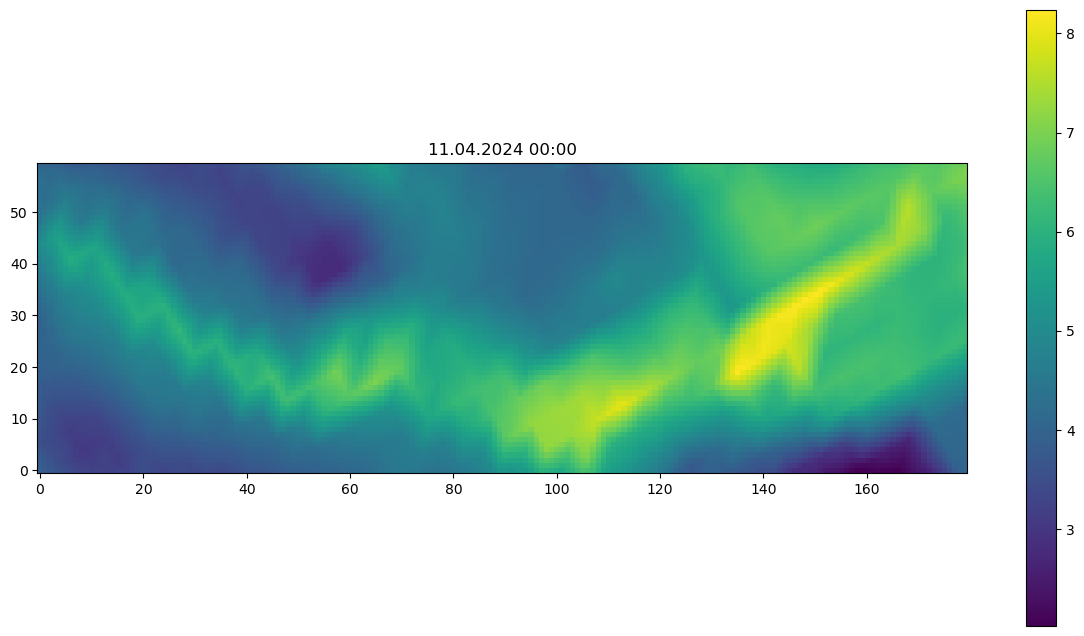

In [24]:
fig = plt.figure(figsize=(15,8))
plt.imshow(bin_array[i_time,:,:]-273.15)
plt.gca().invert_yaxis()
plt.title(date_list[i_time].strftime('%d.%m.%Y %H:%M'))
plt.colorbar()

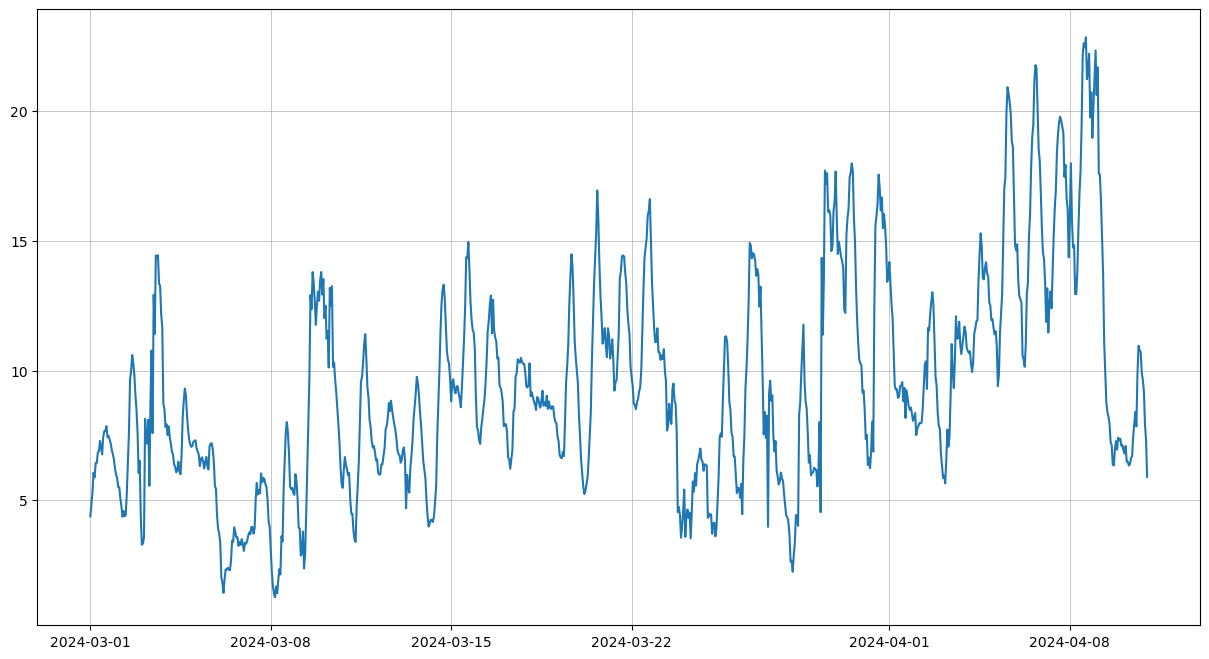

In [28]:
plt.figure(figsize=(15,8))
plt.plot(date_list, bin_array[:,19,41]-273.15)
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# Radiation

In [13]:
var = 'swdown'

In [14]:
bin_file_path_rad = rf"{bin_folder}\{var}.bin"
dtype='>f8'

In [15]:
with open(bin_file_path_rad, 'rb') as fid:
    binary_data_rad = np.fromfile(fid, dtype=dtype)

In [16]:
nx = 1344 / 4
ny = 528 / 4
nt = len(binary_data_rad) / nx /ny

print(f'nx = {nx}, ny= {ny}, nt = {nt}' )

nx = 336.0, ny= 132.0, nt = 6601.0


In [17]:
bin_array_rad = np.reshape(binary_data_rad, (int(nt),int(ny),int(nx)))

In [18]:
bin_array_rad[:,80,150].mean()

np.float64(161.97486350227265)

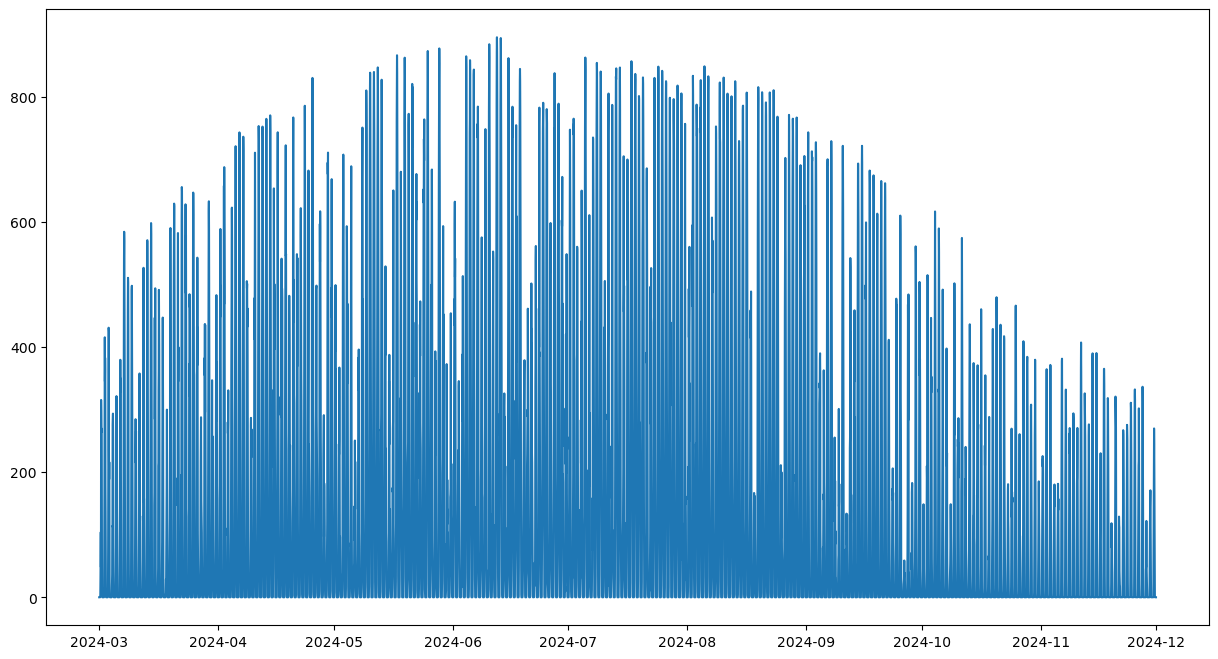

In [19]:
plt.figure(figsize=(15,8))
plt.plot(date_list, bin_array_rad[:,80,150])

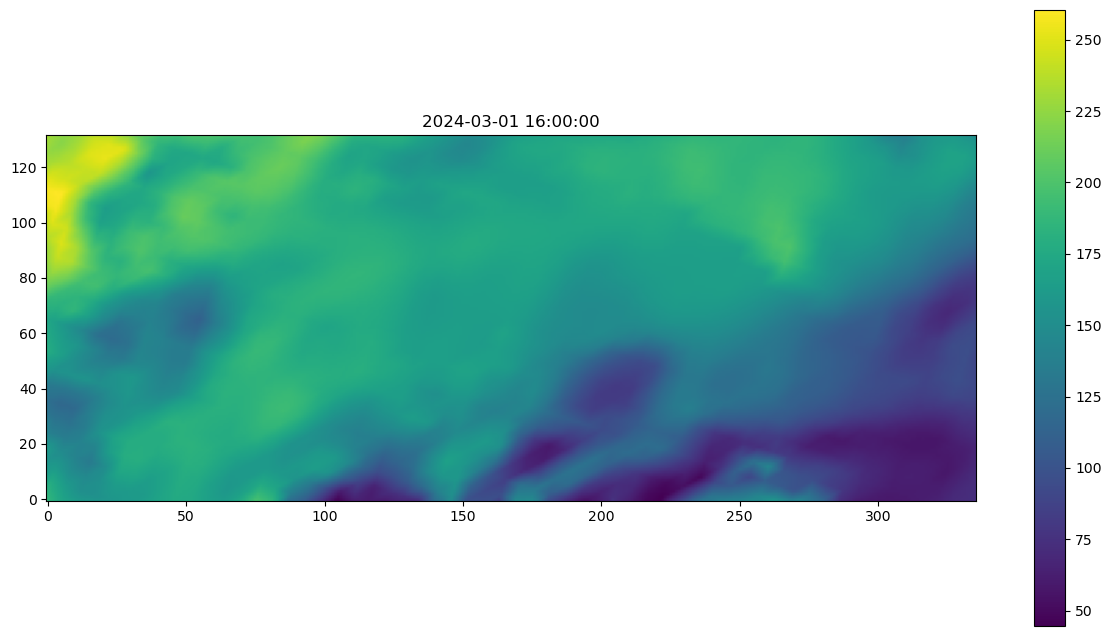

In [20]:
i_time = 16
plt.figure(figsize=(15,8))
plt.imshow(bin_array_rad[i_time,:,:])
plt.gca().invert_yaxis()
plt.title(date_list[i_time])
plt.colorbar()
plt.show()

In [21]:
bin_array_rad[:,80,150]

array([0., 0., 0., ..., 0., 0., 0.], shape=(6601,), dtype='>f8')

In [22]:
bin_array_rad.max()

np.float64(964.0288121794058)

# LW Radiation

In [23]:
var = 'lwdown'

In [24]:
bin_file_path_rad = rf"{bin_folder}\{var}.bin"
dtype='>f8'

In [25]:
with open(bin_file_path_rad, 'rb') as fid:
    binary_data_lw = np.fromfile(fid, dtype=dtype)

In [26]:
nx = 1344 / 4
ny = 528 / 4
nt = len(binary_data_lw) / nx /ny

print(f'nx = {nx}, ny= {ny}, nt = {nt}' )

nx = 336.0, ny= 132.0, nt = 6601.0


In [27]:
binary_data_lw = np.reshape(binary_data_lw, (int(nt),int(ny),int(nx)))

In [28]:
binary_data_lw[:,80,150].mean()

np.float64(330.6984328268867)

In [29]:
date_list[-1]

datetime.datetime(2024, 12, 1, 0, 0)

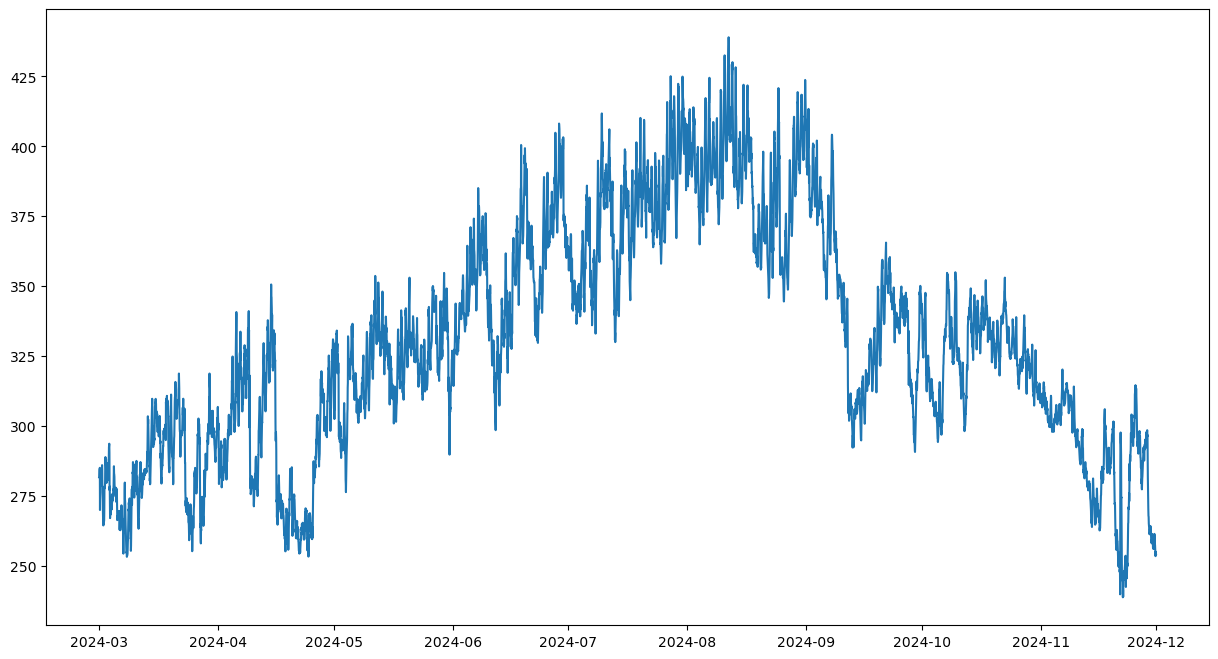

In [30]:
%matplotlib inline 
plt.close('all')
plt.figure(figsize=(15,8))
plt.plot(date_list, binary_data_lw[:,80,150])
plt.show()

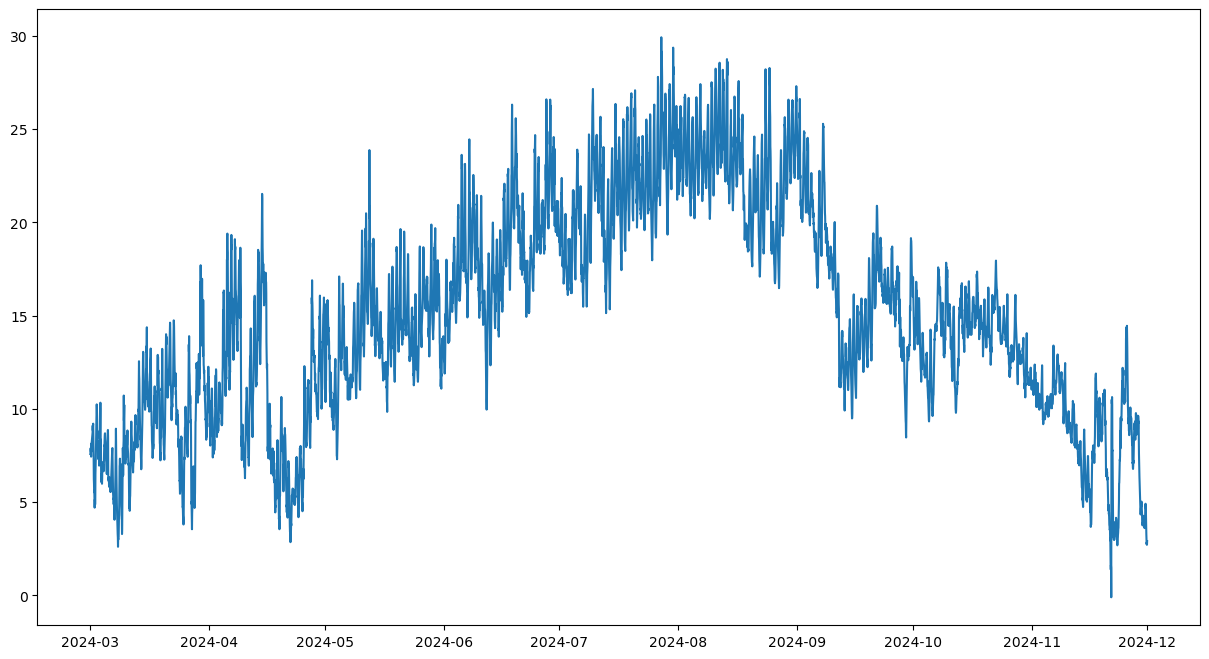

In [31]:
plt.close('all')
plt.figure(figsize=(15,8))
plt.plot(date_list, bin_array[:,80,150]-273.15)
plt.show()

In [32]:
cloud_cover = 0
tempC = 25
atemp = 273.15 + tempC

cloud_cover = cloud_cover/100
vaporPressure = 6.11 * np.exp(17.67 * (atemp-273.15) / (atemp-29.65))  # in units of hPa
A_L = 0.03   # Infrared radiation albedo
a = 1.09     # Calibration parameter
E_a = a * (1 + 0.17 * np.power(cloud_cover, 2)) * 1.24 * np.power(vaporPressure / atemp, 1./7)
lwr = (1 - A_L) * 5.67e-8 * E_a * np.power(atemp, 4)
print(f'T°C = {tempC}, lwr = {lwr}')

T°C = 25, lwr = 426.4007355625817


# Cloud cover

In [33]:
var = 'CLCT'

In [34]:
bin_file_path_rad = rf"{bin_folder}\{var}.bin"
dtype='>f8'

In [35]:
with open(bin_file_path_rad, 'rb') as fid:
    binary_data_lw = np.fromfile(fid, dtype=dtype)

In [36]:
nx = 1344 / 4
ny = 528 / 4
nt = len(binary_data_lw) / nx /ny

print(f'nx = {nx}, ny= {ny}, nt = {nt}' )

nx = 336.0, ny= 132.0, nt = 6601.0


In [37]:
binary_data_lw = np.reshape(binary_data_lw, (int(nt),int(ny),int(nx)))

In [38]:
binary_data_lw[:,80,150].mean()

np.float64(0.3629441448265414)

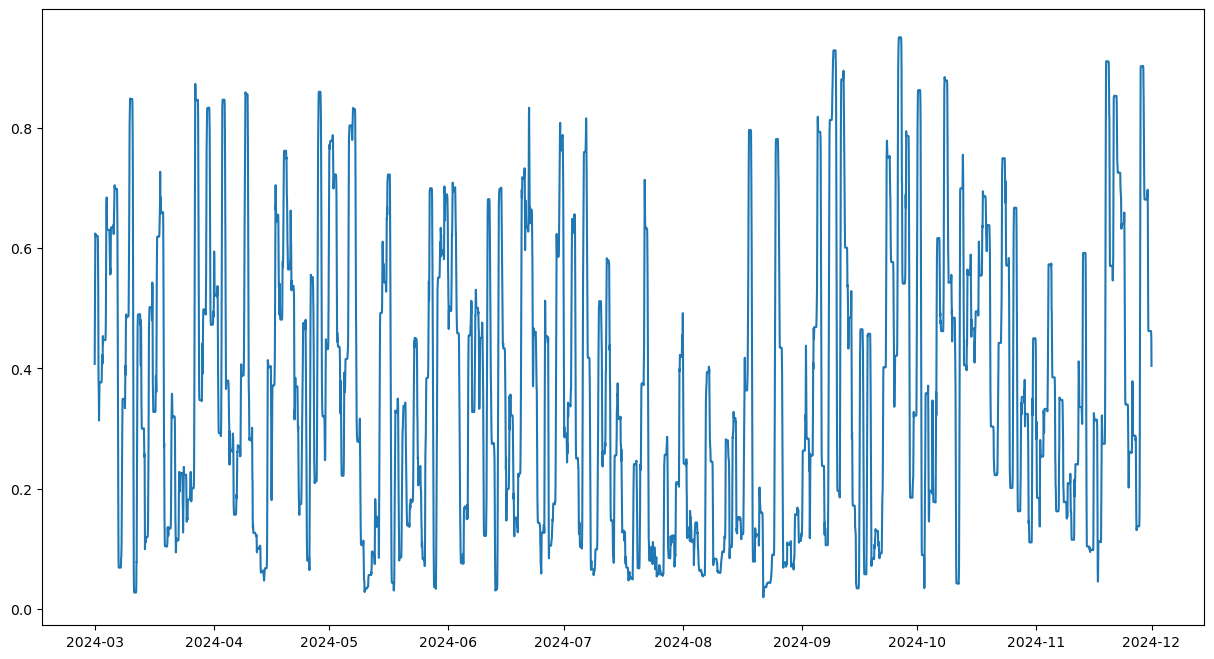

In [39]:
plt.figure(figsize=(15,8))
plt.plot(date_list, binary_data_lw[:,80,150])
plt.show()

In [41]:
binary_data_lw[:,80,150]

array([0.4073, 0.472 , 0.542 , ..., 0.4588, 0.4487, 0.4041],
      shape=(6601,), dtype='>f8')